# CNN Cats and Dogs
JOUDIOUX Alexandre
COURTOIS Fabien
JOUEN Matthias
FAIDIDE Julien

## README

Pour lancer le code, vous devez télécharger le dataset cats and dogs disponible sur kaggle via le lien suivant. https://www.kaggle.com/chetankv/dogs-cats-images <br>
Vérifier que votre installation correspond à la capture d'écran <BR>![alt text](OPENME.png "Title")

Sinon, vous pouvez simplement lancer le dernier bloc de code pour effectuer une prédiction avec le modèle enregistrer dans le répertoire.

In [53]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# Définir les paramètres d'entraînement
batch_size = 32
epochs = 5
img_width, img_height = 150, 150

# Prétraitement des données
train_data_dir = '..\dataset\\cats_and_dogs\\training_set'
validation_data_dir = '..\dataset\\cats_and_dogs\\test_set'

# Utilisation de l'augmentation de données pour éviter le surapprentissage
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_width, img_height),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size = (img_width, img_height),
                                                        batch_size = batch_size,
                                                        class_mode = 'binary')

# Définir le modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


# model.add(Conv2D(16, (3, 3), activation='relu', input_shape = (img_width, img_height, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='softmax'))




# Afficher le résumé du modèle
# model.summary()

# Compiler le modèle
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

# Entraîner le modèle
history = model.fit(train_generator, epochs = epochs, validation_data = validation_generator)

# Enregistrer le modèle
model.save_weights('model_weights.h5')
model.save('model_keras.h5')



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/5
250/250 [==============================] - 109s 430ms/step - loss: 0.6847 - accuracy: 0.5825 - val_loss: 0.5962 - val_accuracy: 0.6865
Epoch 2/5
250/250 [==============================] - 107s 426ms/step - loss: 0.6062 - accuracy: 0.6745 - val_loss: 0.5386 - val_accuracy: 0.7405
Epoch 3/5
250/250 [==============================] - 99s 394ms/step - loss: 0.5656 - accuracy: 0.7067 - val_loss: 0.5220 - val_accuracy: 0.7345
Epoch 4/5
250/250 [==============================] - 106s 423ms/step - loss: 0.5473 - accuracy: 0.7294 - val_loss: 0.4994 - val_accuracy: 0.7600
Epoch 5/5
250/250 [==============================] - 95s 381ms/step - loss: 0.5278 - accuracy: 0.7394 - val_loss: 0.4911 - val_accuracy: 0.7745


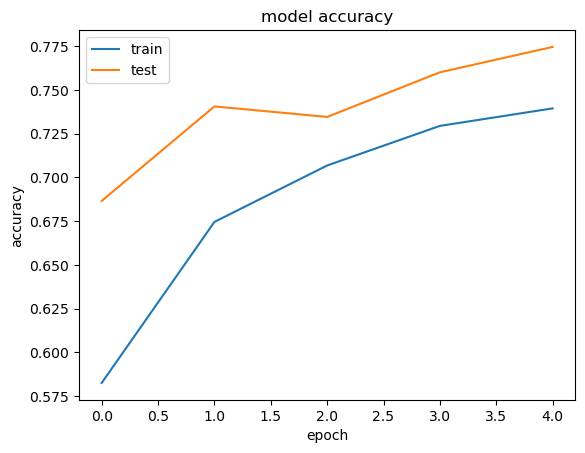

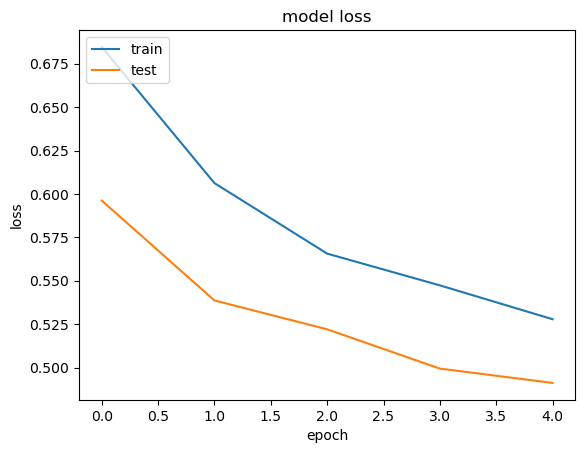

In [54]:
# Afficher les courbes d'apprentissage
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Afficher les courbes de perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

1/1 [==============================] - 0s 79ms/step
dog


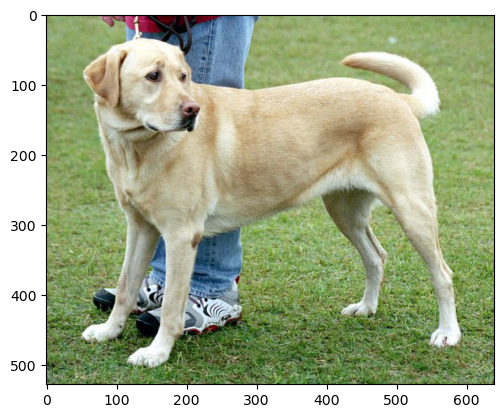

In [55]:
# Prédire les résultats
import numpy as np
import keras.utils as image
imagepath = '..\dataset\\cats_and_dogs\\single_prediction\\cat_or_dog_5.jpg'
test_image = image.load_img(imagepath, target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Afficher la prédiction
print(prediction)

# display image located in single prediction folder using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(imagepath)
imgplot = plt.imshow(img)
plt.show()






1/1 [==============================] - 0s 112ms/step
dog


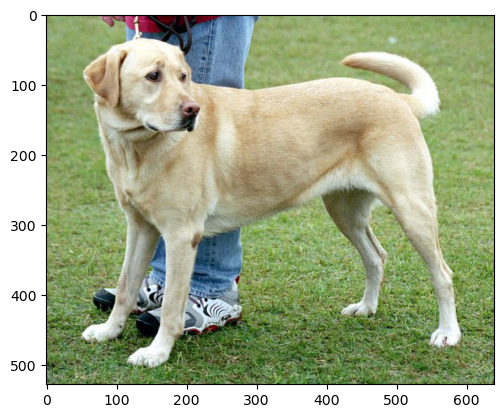

In [1]:
# prédire les résultats en utilisatn les exports du modèle
import numpy as np
import keras.utils as image
from keras.models import load_model
imagepath = '..\dataset\\cats_and_dogs\\single_prediction\\cat_or_dog_5.jpg'
test_image = image.load_img(imagepath, target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
model = load_model('model_keras.h5')
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Afficher la prédiction
print(prediction)

# display image located in single prediction folder using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(imagepath)
imgplot = plt.imshow(img)
plt.show()

